In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
file_path = os.path.join(os.path.pardir, "data/credits.csv")
movies_credits_df = pd.read_csv(file_path)

In [3]:
movies_credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [4]:
movies_credits_df['cast'].iloc[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [5]:
movies_credits_df['crew'].iloc[0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [6]:
import json
import ast

def gender_count(cast_list):
    genders_count = {0:0, 1:0, 2:0}
    cast_list = ast.literal_eval((cast_list))
    for member in cast_list:
    
        member_gender = member['gender']
        genders_count[member_gender] += 1
    
    return genders_count



movies_credits_df["N_male_actors"] = movies_credits_df['cast'].apply(lambda x: gender_count(x)[2])
movies_credits_df["N_female_actors"] = movies_credits_df['cast'].apply(lambda x: gender_count(x)[1])
movies_credits_df["N_other_actors"] = movies_credits_df['cast'].apply(lambda x: gender_count(x)[0])

In [7]:
def main_characters(cast_list, k=3):
    cast_list = ast.literal_eval(cast_list)
    main_characters = []
    for member in cast_list[:min(k, len(cast_list))]:
        main_characters.append(member['name'])

    while len(main_characters) < k:
        main_characters.append("No_Name")
    return main_characters

In [8]:
movies_credits_df["main_character_0"] = movies_credits_df['cast'].apply(lambda x: main_characters(x)[0])
movies_credits_df["main_character_1"] = movies_credits_df['cast'].apply(lambda x: main_characters(x)[1])
movies_credits_df["main_character_2"] = movies_credits_df['cast'].apply(lambda x: main_characters(x)[2])

In [9]:
def director(crew_list):
    crew_list = ast.literal_eval(crew_list)
    for member in crew_list:
        if member['job'] == 'Director':
            return member['name']
    
    return 'No_name'


In [10]:
movies_credits_df['director'] = movies_credits_df['crew'].apply(lambda x: director(x))

In [11]:
movies_credits_df

,cast,crew,id,N_male_actors,N_female_actors,N_other_actors,main_character_0,main_character_1,main_character_2,director
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,9,3,1,Tom Hanks,Tim Allen,Don Rickles,John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,9,6,11,Robin Williams,Jonathan Hyde,Kirsten Dunst,Joe Johnston
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,4,3,0,Walter Matthau,Jack Lemmon,Ann-Margret,Howard Deutch
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,6,4,0,Whitney Houston,Angela Bassett,Loretta Devine,Forest Whitaker
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,6,5,1,Steve Martin,Diane Keaton,Martin Short,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,0,1,2,Leila Hatami,Kourosh Tahami,Elham Korda,Hamid Nematollah
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,1,1,9,Angel Aquino,Perry Dizon,Hazel Orencio,Lav Diaz
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,11,2,2,Erika Eleniak,Adam Baldwin,Julie du Page,Mark L. Lester
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,2,2,1,Iwan Mosschuchin,Nathalie Lissenko,Pavel Pavlov,Yakov Protazanov


In [12]:
a = []
a.extend(movies_credits_df['main_character_0'].unique().tolist())
a.extend(movies_credits_df['main_character_1'].unique().tolist())
a.extend(movies_credits_df['main_character_2'].unique().tolist())
print(len(set(a)))

47482


In [13]:
file_path_movies_metadata = os.path.join(os.path.pardir, "data/movies_metadata.csv")
file_path_movies_ratings = os.path.join(os.path.pardir, "data/ratings.csv")
movies_metadata_df = pd.read_csv(file_path_movies_metadata)
movies_ratings_df = pd.read_csv(file_path_movies_ratings)

C:\Users\Mrabe\AppData\Local\Temp\ipykernel_32916\836164043.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata_df = pd.read_csv(file_path_movies_metadata)


In [14]:
movies_metadata_df_ = pd.read_csv(file_path_movies_metadata)

C:\Users\Mrabe\AppData\Local\Temp\ipykernel_32916\3957664951.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata_df_ = pd.read_csv(file_path_movies_metadata)


In [15]:
movies_metadata_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [16]:
# Extract all the genres across all movies

def extracting_genres(row, genres):
    row = ast.literal_eval(row)
    for el in row:
        if 'name' in el:
            genres.add(el['name'])

    return        

# Storing the genres in 'genres' variable which is a set

genres = set()

for i,row in movies_metadata_df.iterrows():
    if i == 0:
        pass
    else :
        infos = row['genres']
        extracting_genres(infos, genres)


In [17]:
# Function return 1 if the movie belongs to genre category of movies, and 0 otherwise

def is_movie_genre(genre, row):
    row = ast.literal_eval(row)
    list_genres = set([el['name'] for el in row])
    
    if genre in list_genres:
        return 1
    
    return 0


# Applying the function for all genres across all movies

for genre in genres:
    movies_metadata_df[genre] = movies_metadata_df['genres'].apply(lambda row: is_movie_genre(genre, row))

In [18]:
# Extracting production companies 

def extracting_productions_companies(prod_companies, production_companies):
    if pd.isna(prod_companies):
        return 
    prod_companies = ast.literal_eval(prod_companies)
    if isinstance(prod_companies, list):
        for production_company in prod_companies:
            production_companies.add(production_company['name'])
    
    return 


# Applying the function to our dataframe to gather all the production companies' names 

production_companies = set()

for  i, row in movies_metadata_df.iterrows():
    prod_companies = row['production_companies']

    extracting_productions_companies(prod_companies, production_companies)

In [19]:
len(production_companies)

23537

In [20]:
from collections import defaultdict

# Initialize a defaultdict with list as the default factory
movie_id_prod_company = defaultdict(list)

# Iterate over the DataFrame once
for idx, row in movies_metadata_df.iterrows():
    
    if not pd.isna(row['production_companies']):

        production_companies_list = ast.literal_eval(row['production_companies'])
        
        if isinstance(production_companies_list, list):
            
            production_company_names = [prod_company['name'] for prod_company in production_companies_list]
            
            # Append the movie ID to the corresponding production company in the dictionary
            for production_company in production_company_names:
                movie_id_prod_company[production_company].append(row['id'])


movie_id_prod_company = dict(movie_id_prod_company)


In [21]:
import pandas as pd

production_companies_by_movie, movie_ids = [], []

for key, values in movie_id_prod_company.items():
    for value in values:
        production_companies_by_movie.append(key)
        movie_ids.append(value)
                         
cross_movie_prod_company = pd.DataFrame({'movieId': movie_ids, 'production company': production_companies_by_movie})

# Ensure the 'movieId' in movies_ratings_df is of the same type as in cross_movie_prod_company
movies_ratings_df['movieId'] = movies_ratings_df['movieId'].astype(str)
cross_movie_prod_company['movieId'] = cross_movie_prod_company['movieId'].astype(str)

cross_prod_company_ratings = cross_movie_prod_company.merge(movies_ratings_df, how='left', on='movieId')

mean_rating_per_prod_company = cross_prod_company_ratings.groupby('production company')['rating'].mean().reset_index()
mean_rating_per_prod_company.columns = ['production company', 'mean_rating']

max_rating_per_prod_company = cross_prod_company_ratings.groupby('production company')['rating'].max().reset_index()
max_rating_per_prod_company.columns = ['production company', 'max_rating']

min_rating_per_prod_company = cross_prod_company_ratings.groupby('production company')['rating'].min().reset_index()
min_rating_per_prod_company.columns = ['production company', 'min_rating']

cross_prod_company_ratings = cross_prod_company_ratings.merge(mean_rating_per_prod_company, how='left', on='production company')
cross_prod_company_ratings = cross_prod_company_ratings.merge(max_rating_per_prod_company, how='left', on='production company')
cross_prod_company_ratings = cross_prod_company_ratings.merge(min_rating_per_prod_company, how='left', on='production company')

# Assign the ratings to cross_movie_prod_company
cross_movie_prod_company['mean_rating'] = cross_prod_company_ratings['mean_rating']
cross_movie_prod_company['max_rating'] = cross_prod_company_ratings['max_rating']
cross_movie_prod_company['min_rating'] = cross_prod_company_ratings['min_rating']

In [22]:
cross_movie_prod_company.head()

,movieId,production company,mean_rating,max_rating,min_rating
0,862,Pixar Animation Studios,3.259213,5.0,0.5
1,9487,Pixar Animation Studios,3.259213,5.0,0.5
2,863,Pixar Animation Studios,3.259213,5.0,0.5
3,585,Pixar Animation Studios,3.259213,5.0,0.5
4,12,Pixar Animation Studios,3.259213,5.0,0.5


In [23]:
cross_movie_prod_company = cross_movie_prod_company[['movieId', 'mean_rating', 'max_rating', 'min_rating']]

In [24]:
cross_movie_prod_company.columns = ['movieId', 'mean_rating_by_prod_company', 'max_rating_by_prod_company', 'min_rating_by_prod_company']

In [25]:
cross_movie_prod_company.drop_duplicates(subset=['movieId'], inplace=True)

In [26]:
cross_movie_prod_company.head()

,movieId,mean_rating_by_prod_company,max_rating_by_prod_company,min_rating_by_prod_company
0,862,3.259213,5.0,0.5
1,9487,3.259213,5.0,0.5
2,863,3.259213,5.0,0.5
3,585,3.259213,5.0,0.5
4,12,3.259213,5.0,0.5


In [27]:
original_languages = set(movies_metadata_df['original_language'].unique().tolist())

In [28]:
# Function returns 1 if the movie's original languae is 'language' and 0 otherwise

def is_original_language(language, row):
    if row == language:
        return 1
    return 0

# Appying the function for all movies and languages 

for language in original_languages:
    movies_metadata_df[f"original_{language}"] = movies_metadata_df['original_language'].apply(lambda row: is_original_language(language, row))

C:\Users\Mrabe\AppData\Local\Temp\ipykernel_32916\3147087991.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_metadata_df[f"original_{language}"] = movies_metadata_df['original_language'].apply(lambda row: is_original_language(language, row))
C:\Users\Mrabe\AppData\Local\Temp\ipykernel_32916\3147087991.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_metadata_df[f"original_{language}"] = movies_metadata_df['original_language'].apply(lambda row: is_original_language(language, row))
C:\Users\Mrabe\AppData\Loc

In [29]:
cross_movie_director_ratings = pd.DataFrame()
cross_movie_director_ratings['director'] = movies_credits_df['director']
cross_movie_director_ratings['movieId'] = movies_credits_df['id']

In [30]:
# First, calculate the mean, max, min ratings for each movie
mean_ratings = movies_ratings_df.groupby('movieId')['rating'].mean().reset_index()
max_ratings = movies_ratings_df.groupby('movieId')['rating'].max().reset_index()
min_ratings = movies_ratings_df.groupby('movieId')['rating'].min().reset_index()

# Rename the columns for clarity
mean_ratings.columns = ['movieId', 'mean_rating']
min_ratings.columns = ['movieId', 'min_rating']
max_ratings.columns = ['movieId', 'max_rating']

cross_movie_director_ratings['movieId'] = cross_movie_director_ratings['movieId'].astype(str)

# Merge the mean, max, min ratings back with the cross_movie_director_ratings dataframe
optimized_df = cross_movie_director_ratings.merge(mean_ratings, how='left', on='movieId')
optimized_df_max = cross_movie_director_ratings.merge(max_ratings, how='left', on='movieId')
optimized_df_min = cross_movie_director_ratings.merge(min_ratings, how='left', on='movieId')

# If you want to keep the original structure and column names
cross_movie_director_ratings['mean_rating'] = optimized_df['mean_rating']
cross_movie_director_ratings['max_rating'] = optimized_df_max['max_rating']
cross_movie_director_ratings['min_rating'] = optimized_df_min['min_rating']

In [31]:
cross_movie_director_ratings = cross_movie_director_ratings[['movieId', 'mean_rating', 'max_rating', 'min_rating']]

In [32]:
cross_movie_director_ratings.columns = ['movieId', 'mean_rating_by_director', 'max_rating_by_director', 'min_rating_by_director']

In [33]:
cross_movie_director_ratings.head()

,movieId,mean_rating_by_director,max_rating_by_director,min_rating_by_director
0,862,3.598930,5.0,1.0
1,8844,3.760163,5.0,0.5
2,15602,NaN,NaN,NaN
3,31357,NaN,NaN,NaN
4,11862,NaN,NaN,NaN


In [34]:
cross_movie_main_character_0_ratings = pd.DataFrame()
cross_movie_main_character_0_ratings['main_character_0'] = movies_credits_df['main_character_0']
cross_movie_main_character_0_ratings['movieId'] = movies_credits_df['id']

cross_movie_main_character_0_ratings['movieId'] = cross_movie_main_character_0_ratings['movieId'].astype(str)

cross_movie_main_character_0_ratings = cross_movie_main_character_0_ratings.merge(movies_ratings_df, how='left', on='movieId')

# Calculating the mean, max, and min ratings by main character
mean_rating_by_main_character = cross_movie_main_character_0_ratings.groupby('main_character_0')['rating'].mean().reset_index()
max_rating_by_main_character = cross_movie_main_character_0_ratings.groupby('main_character_0')['rating'].max().reset_index()
min_rating_by_main_character = cross_movie_main_character_0_ratings.groupby('main_character_0')['rating'].min().reset_index()

# Renaming the columns
mean_rating_by_main_character.columns = ['main_character_0', 'mean_rating_by_main_character_0']
max_rating_by_main_character.columns = ['main_character_0', 'max_rating_by_main_character_0']
min_rating_by_main_character.columns = ['main_character_0', 'min_rating_by_main_character_0']

# Merging the dataframes
optimized_df_main_character_0_mean = cross_movie_main_character_0_ratings.merge(mean_rating_by_main_character, how='left', on='main_character_0')
optimized_df_main_character_0_max = cross_movie_main_character_0_ratings.merge(max_rating_by_main_character, how='left', on='main_character_0')
optimized_df_main_character_0_min = cross_movie_main_character_0_ratings.merge(min_rating_by_main_character, how='left', on='main_character_0')

# Adding the new columns to the original dataframe
cross_movie_main_character_0_ratings['mean_rating_by_main_character_0'] = optimized_df_main_character_0_mean['mean_rating_by_main_character_0']
cross_movie_main_character_0_ratings['max_rating_by_main_character_0'] = optimized_df_main_character_0_max['max_rating_by_main_character_0']
cross_movie_main_character_0_ratings['min_rating_by_main_character_0'] = optimized_df_main_character_0_min['min_rating_by_main_character_0']

cross_movie_main_character_0_ratings = cross_movie_main_character_0_ratings.drop_duplicates(subset='movieId').reset_index()

In [35]:
cross_movie_main_character_1_ratings = pd.DataFrame()
cross_movie_main_character_1_ratings['main_character_1'] = movies_credits_df['main_character_1']
cross_movie_main_character_1_ratings['movieId'] = movies_credits_df['id']

cross_movie_main_character_1_ratings['movieId'] = cross_movie_main_character_1_ratings['movieId'].astype(str)

cross_movie_main_character_1_ratings = cross_movie_main_character_1_ratings.merge(movies_ratings_df, how='left', on='movieId')

# Calculating the mean, max, and min ratings by main character
mean_rating_by_main_character_1 = cross_movie_main_character_1_ratings.groupby('main_character_1')['rating'].mean().reset_index()
max_rating_by_main_character_1 = cross_movie_main_character_1_ratings.groupby('main_character_1')['rating'].max().reset_index()
min_rating_by_main_character_1 = cross_movie_main_character_1_ratings.groupby('main_character_1')['rating'].min().reset_index()

# Renaming the columns
mean_rating_by_main_character_1.columns = ['main_character_1', 'mean_rating_by_main_character_1']
max_rating_by_main_character_1.columns = ['main_character_1', 'max_rating_by_main_character_1']
min_rating_by_main_character_1.columns = ['main_character_1', 'min_rating_by_main_character_1']

# Merging the dataframes
optimized_df_main_character_1_mean = cross_movie_main_character_1_ratings.merge(mean_rating_by_main_character_1, how='left', on='main_character_1')
optimized_df_main_character_1_max = cross_movie_main_character_1_ratings.merge(max_rating_by_main_character_1, how='left', on='main_character_1')
optimized_df_main_character_1_min = cross_movie_main_character_1_ratings.merge(min_rating_by_main_character_1, how='left', on='main_character_1')

# Adding the new columns to the original dataframe
cross_movie_main_character_1_ratings['mean_rating_by_main_character_1'] = optimized_df_main_character_1_mean['mean_rating_by_main_character_1']
cross_movie_main_character_1_ratings['max_rating_by_main_character_1'] = optimized_df_main_character_1_max['max_rating_by_main_character_1']
cross_movie_main_character_1_ratings['min_rating_by_main_character_1'] = optimized_df_main_character_1_min['min_rating_by_main_character_1']

cross_movie_main_character_1_ratings = cross_movie_main_character_1_ratings.drop_duplicates(subset='movieId').reset_index()

In [36]:
cross_movie_main_character_2_ratings = pd.DataFrame()
cross_movie_main_character_2_ratings['main_character_2'] = movies_credits_df['main_character_2']
cross_movie_main_character_2_ratings['movieId'] = movies_credits_df['id']

cross_movie_main_character_2_ratings['movieId'] = cross_movie_main_character_2_ratings['movieId'].astype(str)

cross_movie_main_character_2_ratings = cross_movie_main_character_2_ratings.merge(movies_ratings_df, how='left', on='movieId')

# Calculating the mean, max, and min ratings by main character
mean_rating_by_main_character_2 = cross_movie_main_character_2_ratings.groupby('main_character_2')['rating'].mean().reset_index()
max_rating_by_main_character_2 = cross_movie_main_character_2_ratings.groupby('main_character_2')['rating'].max().reset_index()
min_rating_by_main_character_2 = cross_movie_main_character_2_ratings.groupby('main_character_2')['rating'].min().reset_index()

# Renaming the columns
mean_rating_by_main_character_2.columns = ['main_character_2', 'mean_rating_by_main_character_2']
max_rating_by_main_character_2.columns = ['main_character_2', 'max_rating_by_main_character_2']
min_rating_by_main_character_2.columns = ['main_character_2', 'min_rating_by_main_character_2']

# Merging the dataframes
optimized_df_main_character_2_mean = cross_movie_main_character_2_ratings.merge(mean_rating_by_main_character_2, how='left', on='main_character_2')
optimized_df_main_character_2_max = cross_movie_main_character_2_ratings.merge(max_rating_by_main_character_2, how='left', on='main_character_2')
optimized_df_main_character_2_min = cross_movie_main_character_2_ratings.merge(min_rating_by_main_character_2, how='left', on='main_character_2')

# Adding the new columns to the original dataframe
cross_movie_main_character_2_ratings['mean_rating_by_main_character_2'] = optimized_df_main_character_2_mean['mean_rating_by_main_character_2']
cross_movie_main_character_2_ratings['max_rating_by_main_character_2'] = optimized_df_main_character_2_max['max_rating_by_main_character_2']
cross_movie_main_character_2_ratings['min_rating_by_main_character_2'] = optimized_df_main_character_2_min['min_rating_by_main_character_2']

cross_movie_main_character_2_ratings = cross_movie_main_character_2_ratings.drop_duplicates(subset='movieId').reset_index()

In [37]:
cross_movie_main_character_0_ratings['mean_rating_by_main_character_0'] = cross_movie_main_character_0_ratings['mean_rating_by_main_character_0'].fillna(cross_movie_main_character_0_ratings['mean_rating_by_main_character_0'].mean())
cross_movie_main_character_0_ratings['max_rating_by_main_character_0'] = cross_movie_main_character_0_ratings['max_rating_by_main_character_0'].fillna(cross_movie_main_character_0_ratings['max_rating_by_main_character_0'].mean())
cross_movie_main_character_0_ratings['min_rating_by_main_character_0'] = cross_movie_main_character_0_ratings['min_rating_by_main_character_0'].fillna(cross_movie_main_character_0_ratings['min_rating_by_main_character_0'].mean())

cross_movie_main_character_1_ratings['mean_rating_by_main_character_1'] = cross_movie_main_character_1_ratings['mean_rating_by_main_character_1'].fillna(cross_movie_main_character_1_ratings['mean_rating_by_main_character_1'].mean())
cross_movie_main_character_1_ratings['max_rating_by_main_character_1'] = cross_movie_main_character_1_ratings['max_rating_by_main_character_1'].fillna(cross_movie_main_character_1_ratings['max_rating_by_main_character_1'].mean())
cross_movie_main_character_1_ratings['min_rating_by_main_character_1'] = cross_movie_main_character_1_ratings['min_rating_by_main_character_1'].fillna(cross_movie_main_character_1_ratings['min_rating_by_main_character_1'].mean())

cross_movie_main_character_2_ratings['mean_rating_by_main_character_2'] = cross_movie_main_character_2_ratings['mean_rating_by_main_character_2'].fillna(cross_movie_main_character_2_ratings['mean_rating_by_main_character_2'].mean())
cross_movie_main_character_2_ratings['max_rating_by_main_character_2'] = cross_movie_main_character_2_ratings['max_rating_by_main_character_2'].fillna(cross_movie_main_character_2_ratings['max_rating_by_main_character_2'].mean())
cross_movie_main_character_2_ratings['min_rating_by_main_character_2'] = cross_movie_main_character_2_ratings['min_rating_by_main_character_2'].fillna(cross_movie_main_character_2_ratings['min_rating_by_main_character_2'].mean())

In [38]:
cross_movie_main_character_0_ratings.head()

,index,main_character_0,movieId,userId,rating,timestamp,mean_rating_by_main_character_0,max_rating_by_main_character_0,min_rating_by_main_character_0
0,0,Tom Hanks,862,1923.0,3.0,8.583350e+08,4.006582,5.0,0.5
1,374,Robin Williams,8844,7016.0,4.0,1.257352e+09,3.746078,5.0,0.5
2,497,Walter Matthau,15602,NaN,NaN,NaN,3.479260,5.0,0.5
3,498,Whitney Houston,31357,NaN,NaN,NaN,2.617949,5.0,0.5
4,499,Steve Martin,11862,NaN,NaN,NaN,3.311848,5.0,0.5


In [39]:
cross_movie_main_character_1_ratings.head()

,index,main_character_1,movieId,userId,rating,timestamp,mean_rating_by_main_character_1,max_rating_by_main_character_1,min_rating_by_main_character_1
0,0,Tim Allen,862,1923.0,3.0,8.583350e+08,3.571979,5.0,1.0
1,374,Jonathan Hyde,8844,7016.0,4.0,1.257352e+09,3.760163,5.0,0.5
2,497,Jack Lemmon,15602,NaN,NaN,NaN,3.143179,5.0,0.5
3,498,Angela Bassett,31357,NaN,NaN,NaN,3.471830,5.0,0.5
4,499,Diane Keaton,11862,NaN,NaN,NaN,3.262956,5.0,0.5


In [40]:
cross_movie_main_character_2_ratings.head()

,index,main_character_2,movieId,userId,rating,timestamp,mean_rating_by_main_character_2,max_rating_by_main_character_2,min_rating_by_main_character_2
0,0,Don Rickles,862,1923.0,3.0,8.583350e+08,3.671031,5.000000,0.500000
1,374,Kirsten Dunst,8844,7016.0,4.0,1.257352e+09,3.707764,5.000000,0.500000
2,497,Ann-Margret,15602,NaN,NaN,NaN,3.067925,5.000000,0.500000
3,498,Loretta Devine,31357,NaN,NaN,NaN,3.251223,4.769761,0.782669
4,499,Martin Short,11862,NaN,NaN,NaN,3.097222,5.000000,0.500000


In [41]:
cross_movie_main_character_0_ratings = cross_movie_main_character_0_ratings[['movieId','mean_rating_by_main_character_0', 'max_rating_by_main_character_0', 'min_rating_by_main_character_0']]

cross_movie_main_character_1_ratings = cross_movie_main_character_1_ratings[['movieId','mean_rating_by_main_character_1', 'max_rating_by_main_character_1', 'min_rating_by_main_character_1']]

cross_movie_main_character_2_ratings = cross_movie_main_character_2_ratings[['movieId','mean_rating_by_main_character_2', 'max_rating_by_main_character_2', 'min_rating_by_main_character_2']]

In [42]:
cross_movie_main_characters_ratings = cross_movie_main_character_0_ratings.merge(cross_movie_main_character_1_ratings, on='movieId', how='left').merge(cross_movie_main_character_2_ratings, on='movieId', how='left')

In [43]:
cross_movie_main_characters_ratings.head()

,movieId,mean_rating_by_main_character_0,max_rating_by_main_character_0,min_rating_by_main_character_0,mean_rating_by_main_character_1,max_rating_by_main_character_1,min_rating_by_main_character_1,mean_rating_by_main_character_2,max_rating_by_main_character_2,min_rating_by_main_character_2
0,862,4.006582,5.0,0.5,3.571979,5.0,1.0,3.671031,5.000000,0.500000
1,8844,3.746078,5.0,0.5,3.760163,5.0,0.5,3.707764,5.000000,0.500000
2,15602,3.479260,5.0,0.5,3.143179,5.0,0.5,3.067925,5.000000,0.500000
3,31357,2.617949,5.0,0.5,3.471830,5.0,0.5,3.251223,4.769761,0.782669
4,11862,3.311848,5.0,0.5,3.262956,5.0,0.5,3.097222,5.000000,0.500000


In [44]:
spoken_languages_set = set()

for _,row in movies_metadata_df.iterrows():
    spoken_languages = row['spoken_languages']
    if not pd.isna(spoken_languages):
        spoken_languages = ast.literal_eval(spoken_languages)

        if isinstance(spoken_languages, list):
            for language in spoken_languages:
                spoken_languages_set.add(language['name'])

# Function returns 1 if the movie's original languae is 'language' and 0 otherwise
def is_spoken_language(language, row):
    if not pd.isna(row):
        row = ast.literal_eval(row)
    
        for el in row:
            if el['name'] == language:
                return 1
    return 0

# Appying the function for all movies and languages 

for language in spoken_languages_set:
    movies_metadata_df[f"spoken_{language}"] = movies_metadata_df['spoken_languages'].apply(lambda row: is_spoken_language(language, row))

C:\Users\Mrabe\AppData\Local\Temp\ipykernel_32916\660261443.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_metadata_df[f"spoken_{language}"] = movies_metadata_df['spoken_languages'].apply(lambda row: is_spoken_language(language, row))
C:\Users\Mrabe\AppData\Local\Temp\ipykernel_32916\660261443.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_metadata_df[f"spoken_{language}"] = movies_metadata_df['spoken_languages'].apply(lambda row: is_spoken_language(language, row))
C:\Users\Mrabe\AppData\Local\Temp\ipyk

In [45]:
drop_cols = ['adult',
 'belongs_to_collection','genres',
 'homepage','imdb_id',
 'original_language',
 'overview','poster_path',
 'production_companies',
 'production_countries',
 'spoken_languages',
 'title',
 'tagline']


movies_metadata_df.drop(columns=drop_cols, inplace=True)

In [46]:
movies_metadata_df['video'].fillna(False, inplace=True)
movies_metadata_df['video'] = movies_metadata_df['video'].astype(int)

In [47]:
movies_metadata_df['status'].fillna("Not defined", inplace=True)
status_list = movies_metadata_df['status'].unique().tolist()


for status in status_list:
    movies_metadata_df[status] = movies_metadata_df['status'].apply(lambda x: int(x==status))

C:\Users\Mrabe\AppData\Local\Temp\ipykernel_32916\3926143984.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_metadata_df[status] = movies_metadata_df['status'].apply(lambda x: int(x==status))
C:\Users\Mrabe\AppData\Local\Temp\ipykernel_32916\3926143984.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_metadata_df[status] = movies_metadata_df['status'].apply(lambda x: int(x==status))
C:\Users\Mrabe\AppData\Local\Temp\ipykernel_32916\3926143984.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is 

In [48]:
movies_all_type_ratings = cross_movie_director_ratings.merge(cross_movie_main_characters_ratings, on='movieId', how='outer').merge(cross_movie_prod_company, on='movieId', how='outer')

In [49]:
movies_metadata_df.rename(columns={'id':'movieId'}, inplace=True)

In [50]:
movies_metadata_df

,budget,movieId,original_title,popularity,release_date,revenue,runtime,status,video,vote_average,...,spoken_български език,spoken_Magyar,spoken_ภาษาไทย,Released,Not defined,Rumored,Post Production,In Production,Planned,Canceled
0,30000000,862,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,0,7.7,...,0,0,0,1,0,0,0,0,0,0
1,65000000,8844,Jumanji,17.015539,1995-12-15,262797249.0,104.0,Released,0,6.9,...,0,0,0,1,0,0,0,0,0,0
2,0,15602,Grumpier Old Men,11.7129,1995-12-22,0.0,101.0,Released,0,6.5,...,0,0,0,1,0,0,0,0,0,0
3,16000000,31357,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,Released,0,6.1,...,0,0,0,1,0,0,0,0,0,0
4,0,11862,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,106.0,Released,0,5.7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,439050,رگ خواب,0.072051,NaN,0.0,90.0,Released,0,4.0,...,0,0,0,1,0,0,0,0,0,0
45462,0,111109,Siglo ng Pagluluwal,0.178241,2011-11-17,0.0,360.0,Released,0,9.0,...,0,0,0,1,0,0,0,0,0,0
45463,0,67758,Betrayal,0.903007,2003-08-01,0.0,90.0,Released,0,3.8,...,0,0,0,1,0,0,0,0,0,0
45464,0,227506,Satana likuyushchiy,0.003503,1917-10-21,0.0,87.0,Released,0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [75]:
movies_dataframe_final = movies_metadata_df.merge(movies_all_type_ratings, on='movieId', how='left')

In [76]:
movies_dataframe_final

,budget,movieId,original_title,popularity,release_date,revenue,runtime,status,video,vote_average,...,min_rating_by_main_character_0,mean_rating_by_main_character_1,max_rating_by_main_character_1,min_rating_by_main_character_1,mean_rating_by_main_character_2,max_rating_by_main_character_2,min_rating_by_main_character_2,mean_rating_by_prod_company,max_rating_by_prod_company,min_rating_by_prod_company
0,30000000,862,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,0,7.7,...,0.500000,3.571979,5.000000,1.000000,3.671031,5.000000,0.500000,3.259213,5.0,0.5
1,65000000,8844,Jumanji,17.015539,1995-12-15,262797249.0,104.0,Released,0,6.9,...,0.500000,3.760163,5.000000,0.500000,3.707764,5.000000,0.500000,3.259213,5.0,0.5
2,0,15602,Grumpier Old Men,11.7129,1995-12-22,0.0,101.0,Released,0,6.5,...,0.500000,3.143179,5.000000,0.500000,3.067925,5.000000,0.500000,3.259213,5.0,0.5
3,16000000,31357,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,Released,0,6.1,...,0.500000,3.471830,5.000000,0.500000,3.251223,4.769761,0.782669,3.259213,5.0,0.5
4,0,11862,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,106.0,Released,0,5.7,...,0.500000,3.262956,5.000000,0.500000,3.097222,5.000000,0.500000,3.259213,5.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45537,0,439050,رگ خواب,0.072051,NaN,0.0,90.0,Released,0,4.0,...,0.500000,3.229300,4.770567,0.792672,3.251223,4.769761,0.782669,NaN,NaN,NaN
45538,0,111109,Siglo ng Pagluluwal,0.178241,2011-11-17,0.0,360.0,Released,0,9.0,...,0.500000,2.583333,3.500000,0.500000,2.583333,3.500000,0.500000,3.722922,5.0,0.5
45539,0,67758,Betrayal,0.903007,2003-08-01,0.0,90.0,Released,0,3.8,...,0.778757,2.993976,5.000000,0.500000,3.251223,4.769761,0.782669,3.722922,5.0,0.5
45540,0,227506,Satana likuyushchiy,0.003503,1917-10-21,0.0,87.0,Released,0,0.0,...,0.778757,3.229300,4.770567,0.792672,3.251223,4.769761,0.782669,3.722922,5.0,0.5


In [77]:
# Function to check if a value can be converted to float
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
    

def is_int(value):
    try:
        int(value)
        return True
    except ValueError:
        return False
    


# Create a boolean mask to filter rows where the 'budget' column can be converted to float
float_budgets_mask = movies_dataframe_final['budget'].apply(is_float)

# Use the mask to filter the DataFrame and then select and convert the 'budget' column to float
budgets = movies_dataframe_final[float_budgets_mask]['budget'].astype(float)

In [78]:
budgets.describe()

count    4.553900e+04
mean     4.223191e+06
std      1.741354e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [79]:
movies_dataframe_final['budget'] = movies_dataframe_final['budget'].apply(lambda x: x if is_float(x) else 0.0)
movies_dataframe_final['revenue'] = movies_dataframe_final['revenue'].apply(lambda x: x if is_float(x) else 0.0)

In [80]:
movies_dataframe_final['budget'] = movies_dataframe_final['budget'].astype(float)
movies_dataframe_final['budget'].fillna(movies_dataframe_final['budget'].mean(), inplace=True)


movies_dataframe_final['revenue'] = movies_dataframe_final['revenue'].astype(float)
movies_dataframe_final['revenue'].fillna(movies_dataframe_final['revenue'].mean(), inplace=True)

In [81]:
movies_dataframe_final['ratio_benefit'] = movies_dataframe_final['revenue'] / (movies_dataframe_final['budget'] + 1)

C:\Users\Mrabe\AppData\Local\Temp\ipykernel_32916\4290347412.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_dataframe_final['ratio_benefit'] = movies_dataframe_final['revenue'] / (movies_dataframe_final['budget'] + 1)


In [82]:
movies_dataframe_final['release_date'] = pd.to_datetime(movies_dataframe_final['release_date'], errors='coerce')

In [83]:
movies_dataframe_final.drop(columns=['status'], inplace=True)

In [84]:
movies_dataframe_final.head()

,budget,movieId,original_title,popularity,release_date,revenue,runtime,video,vote_average,vote_count,...,mean_rating_by_main_character_1,max_rating_by_main_character_1,min_rating_by_main_character_1,mean_rating_by_main_character_2,max_rating_by_main_character_2,min_rating_by_main_character_2,mean_rating_by_prod_company,max_rating_by_prod_company,min_rating_by_prod_company,ratio_benefit
0,30000000.0,862,Toy Story,21.946943,1995-10-30,373554033.0,81.0,0,7.7,5415.0,...,3.571979,5.0,1.0,3.671031,5.000000,0.500000,3.259213,5.0,0.5,1.245180e+01
1,65000000.0,8844,Jumanji,17.015539,1995-12-15,262797249.0,104.0,0,6.9,2413.0,...,3.760163,5.0,0.5,3.707764,5.000000,0.500000,3.259213,5.0,0.5,4.043035e+00
2,0.0,15602,Grumpier Old Men,11.7129,1995-12-22,0.0,101.0,0,6.5,92.0,...,3.143179,5.0,0.5,3.067925,5.000000,0.500000,3.259213,5.0,0.5,0.000000e+00
3,16000000.0,31357,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,0,6.1,34.0,...,3.471830,5.0,0.5,3.251223,4.769761,0.782669,3.259213,5.0,0.5,5.090759e+00
4,0.0,11862,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,106.0,0,5.7,173.0,...,3.262956,5.0,0.5,3.097222,5.000000,0.500000,3.259213,5.0,0.5,7.657891e+07


In [85]:
cols_distribution = ['mean_rating_by_director',
                    'max_rating_by_director',
                    'min_rating_by_director',
                    'mean_rating_by_main_character_0',
                    'max_rating_by_main_character_0',
                    'min_rating_by_main_character_0',
                    'mean_rating_by_main_character_1',
                    'max_rating_by_main_character_1',
                    'min_rating_by_main_character_1',
                    'mean_rating_by_main_character_2',
                    'max_rating_by_main_character_2',
                    'min_rating_by_main_character_2',
                    'mean_rating_by_prod_company',
                    'max_rating_by_prod_company',
                    'min_rating_by_prod_company',
                    'ratio_benefit']

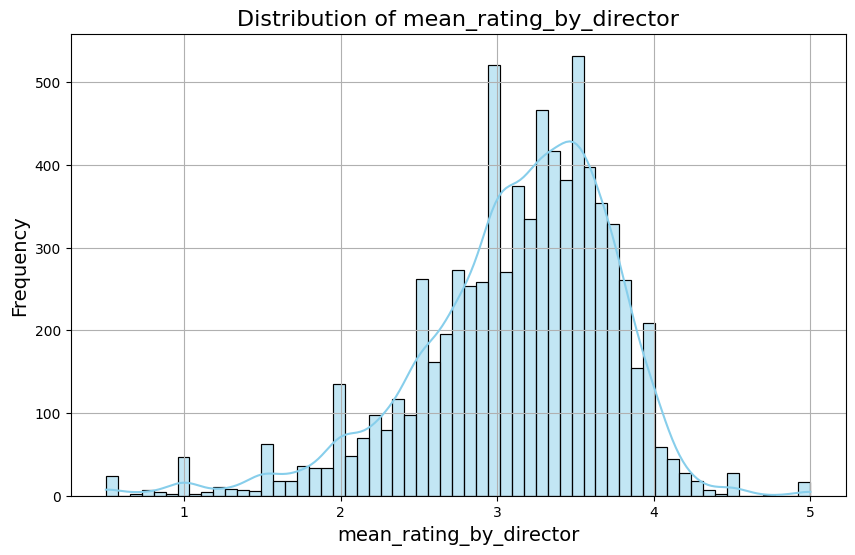

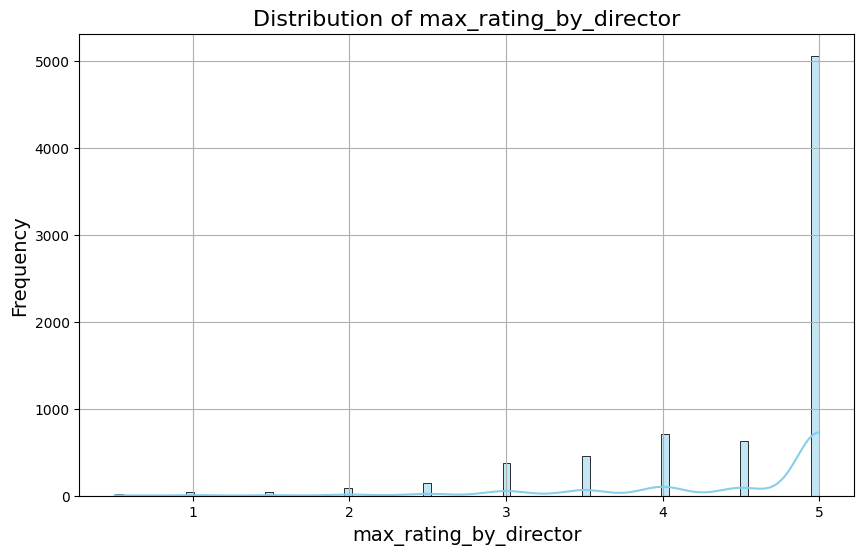

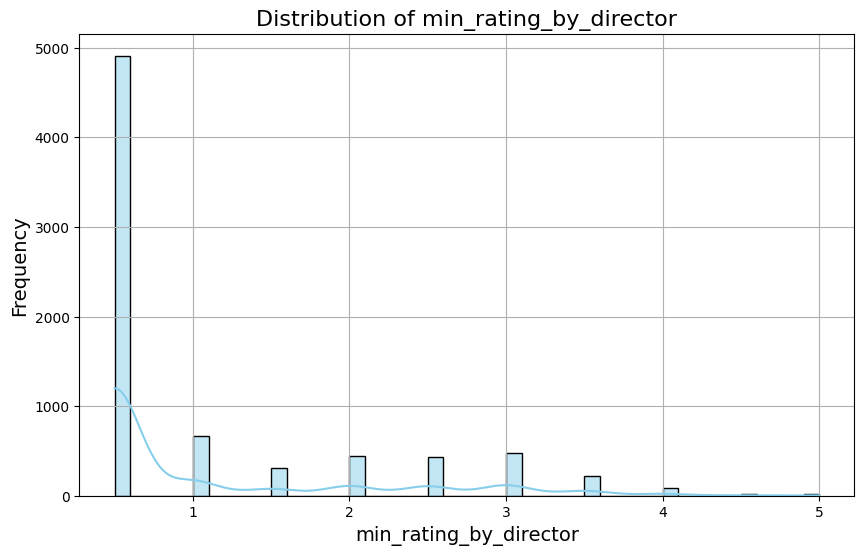

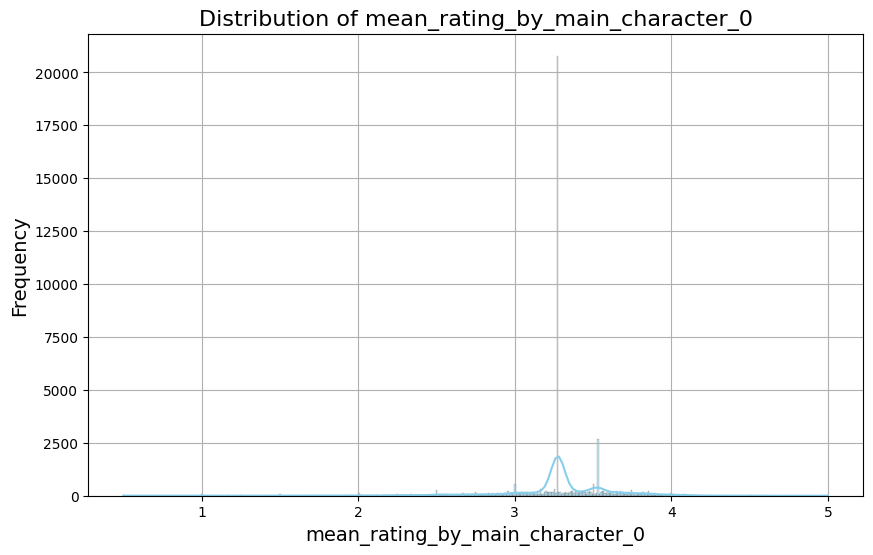

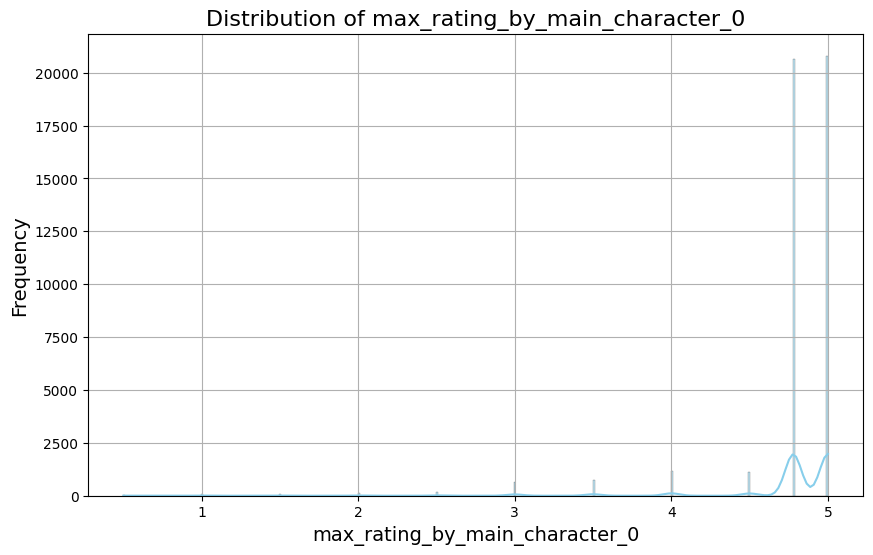

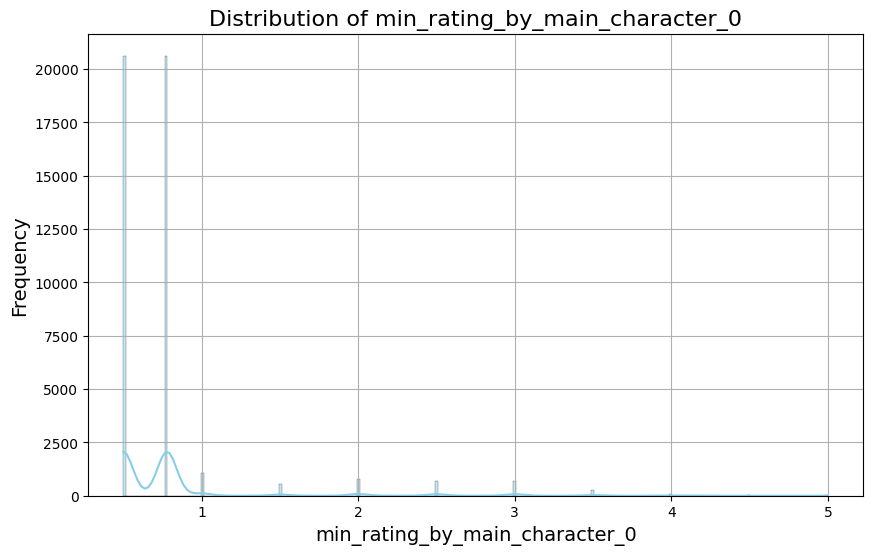

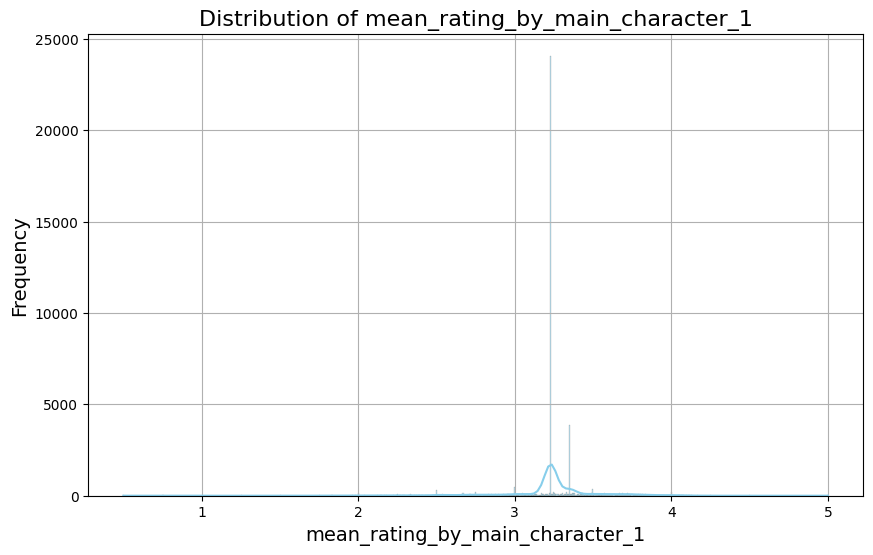

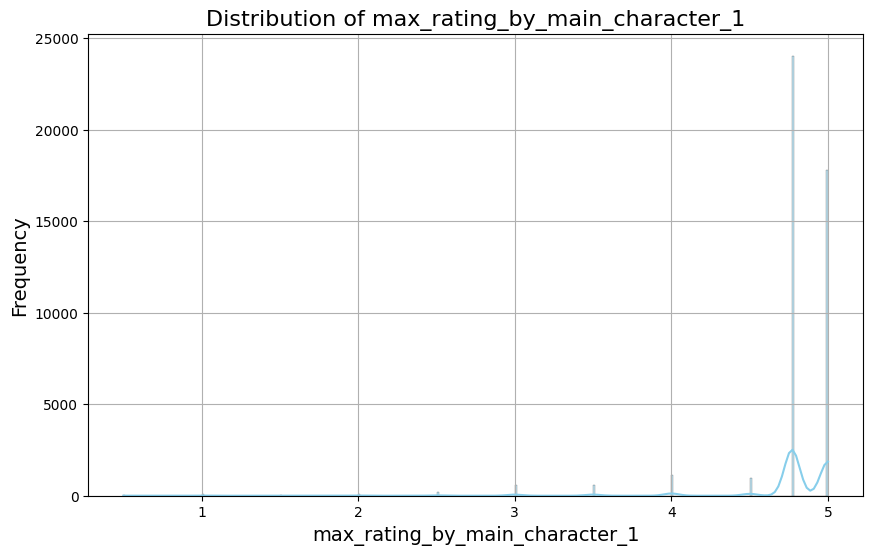

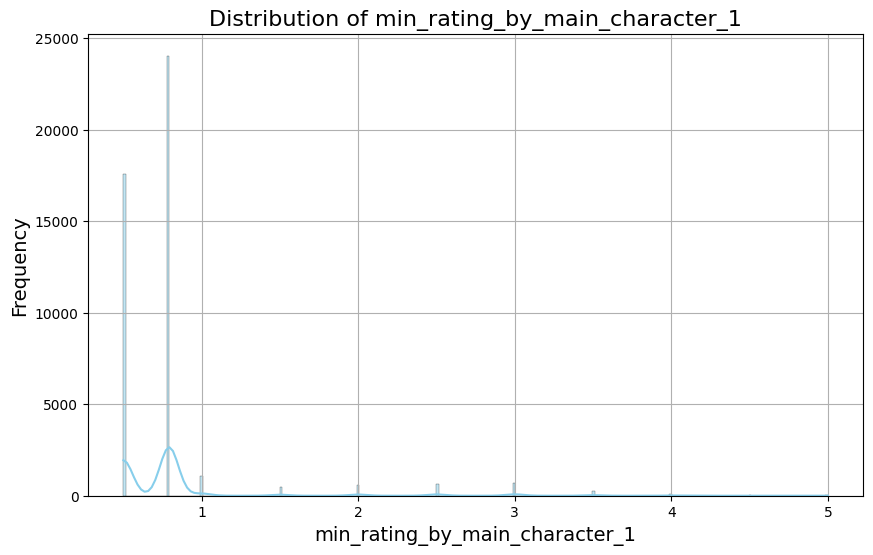

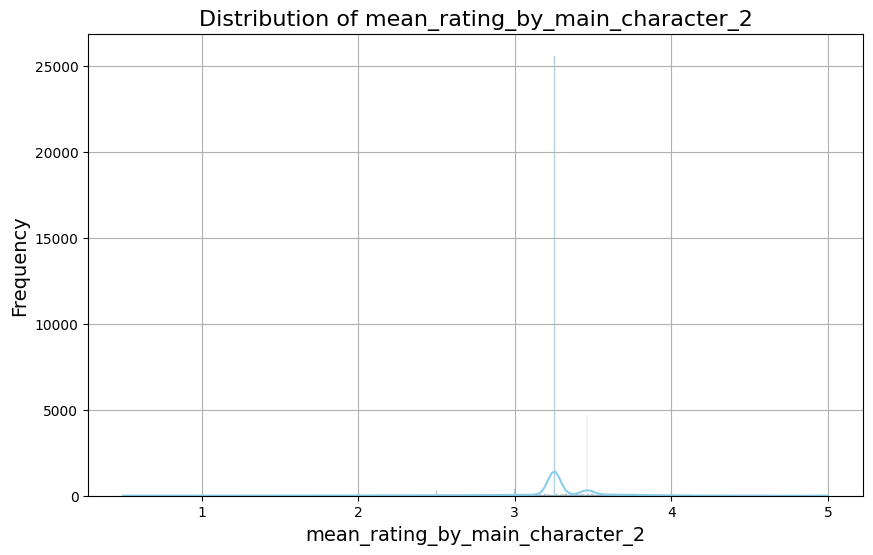

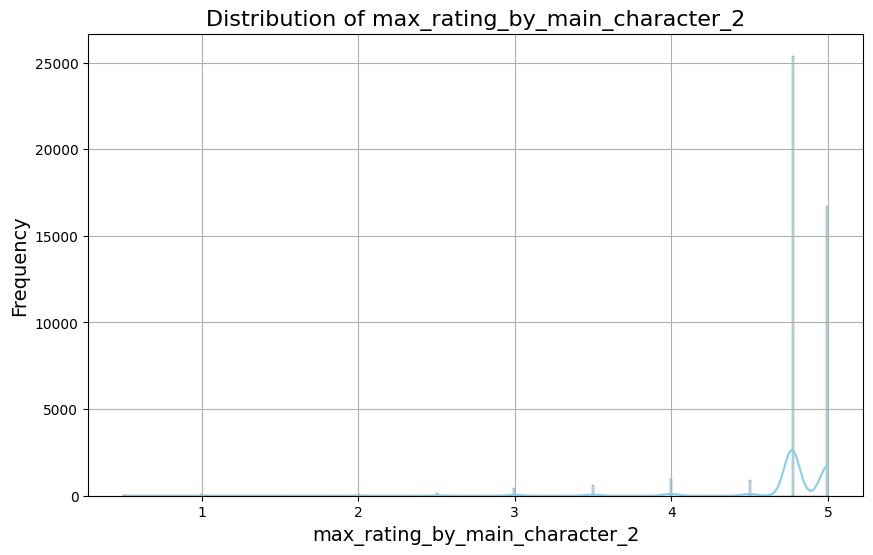

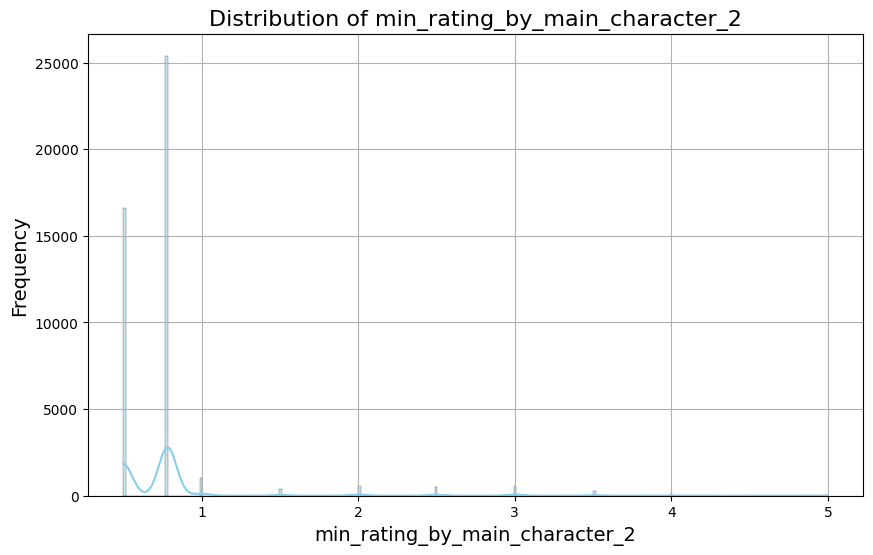

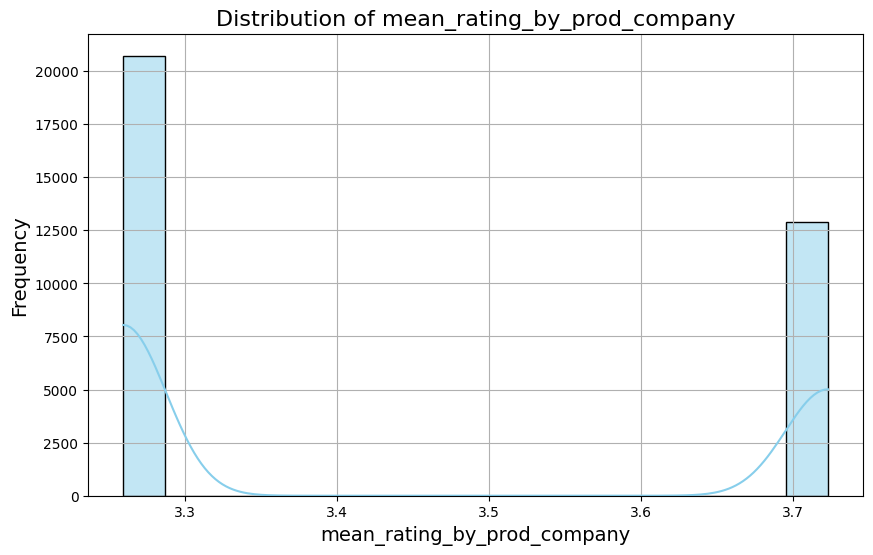

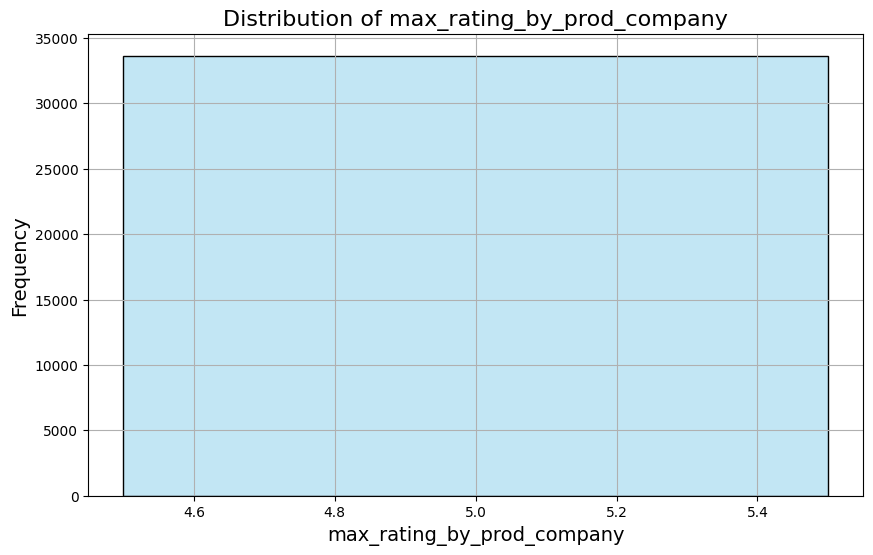

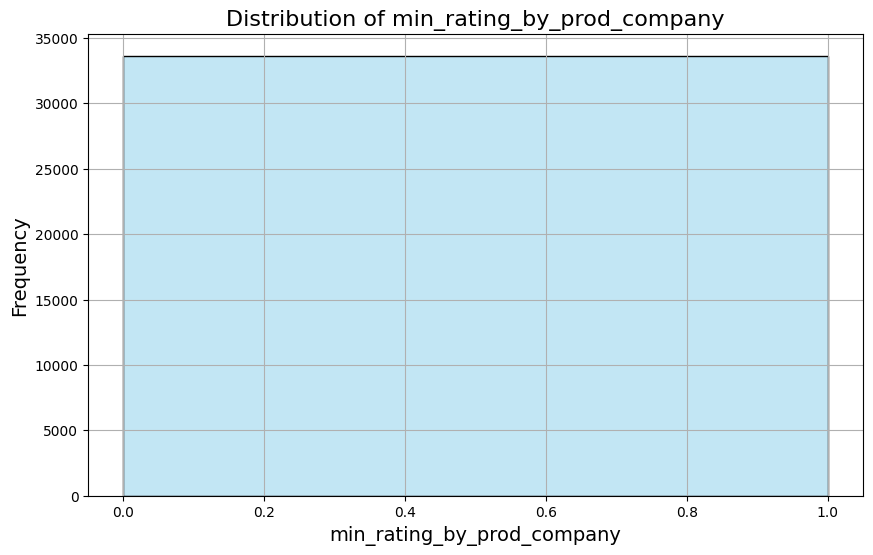

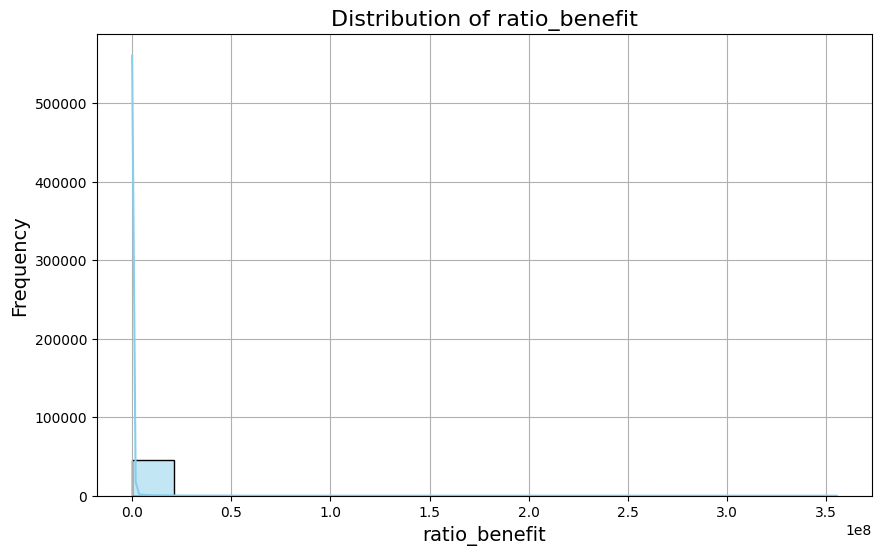

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in cols_distribution:
    plt.figure(figsize=(10, 6))
    sns.histplot(movies_dataframe_final[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()

We notice that 'min_rating_by_prod_company' and 'max_rating_by_prod_company' are constants, we should then remove these columns, since they don't bring additional information

In [87]:
movies_dataframe_final.drop(columns=['min_rating_by_prod_company', 'max_rating_by_prod_company'], inplace=True)

In [88]:
columns = movies_dataframe_final.columns.to_list()

for col in columns:
    if col != 'release_date' and col != 'movieId' and col != 'original_title':
        # Convert non-float values to NaN
        movies_dataframe_final[col] = movies_dataframe_final[col].apply(lambda x: float(x) if is_float(x) else np.nan)
    
        movies_dataframe_final[col] = movies_dataframe_final[col].astype(float)

        col_mean = movies_dataframe_final[col].mean(skipna=True)
        movies_dataframe_final[col].fillna(col_mean, inplace=True)
        
        col_mean = movies_dataframe_final[col].mean(skipna=True)
        col_std = movies_dataframe_final[col].std(skipna=True)
        movies_dataframe_final[col] = (movies_dataframe_final[col] - col_mean) / col_std

movies_dataframe_final['movieId'] = movies_dataframe_final['movieId'].apply(lambda x: x if is_int(x) else 0)
movies_dataframe_final['movieId'] = movies_dataframe_final['movieId'].astype(int)

In [89]:
movies_ratings_df = movies_ratings_df[['movieId','rating']]

In [90]:
movies_ratings_df.head()

,movieId,rating
0,110,1.0
1,147,4.5
2,858,5.0
3,1221,5.0
4,1246,5.0


In [91]:
value_counts_ratings = movies_ratings_df['movieId'].value_counts()
value_counts_ratings = value_counts_ratings.reset_index()
value_counts_ratings.columns = ['movieId', 'count']
value_counts_ratings['movieId'] = value_counts_ratings['movieId'].astype(int)
value_counts_ratings['count'] = value_counts_ratings['count'].astype(int)

value_counts_ratings.sort_values(by='count', ascending=False, inplace=True)
value_counts_ratings.head()

,movieId,count
0,356,91921
1,318,91082
2,296,87901
3,593,84078
4,2571,77960


In [92]:
movies_dataframe_final = movies_dataframe_final.merge(value_counts_ratings, on='movieId', how='left')
movies_dataframe_final.sort_values(by='count', ascending=False, inplace=True)
movies_dataframe_final.reset_index(inplace=True)
movies_dataframe_final.head()

C:\Users\Mrabe\AppData\Local\Temp\ipykernel_32916\343111531.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies_dataframe_final.reset_index(inplace=True)


,index,budget,movieId,original_title,popularity,release_date,revenue,runtime,video,vote_average,...,min_rating_by_main_character_0,mean_rating_by_main_character_1,max_rating_by_main_character_1,min_rating_by_main_character_1,mean_rating_by_main_character_2,max_rating_by_main_character_2,min_rating_by_main_character_2,mean_rating_by_prod_company,ratio_benefit,count
0,4025,0.216912,318,The Million Dollar Hotel,0.335964,2000-02-09,-0.174219,0.728011,-0.045235,0.146495,...,-0.526117,3.478570,0.549688,-0.578246,3.443951,0.553555,-0.583511,-0.918523,-0.092618,91082.0
1,6399,11.243154,296,Terminator 3: Rise of the Machines,2.981965,2003-07-02,6.593328,0.388473,-0.045235,0.146495,...,-0.526117,2.770292,0.549688,-0.578246,2.686671,0.553555,-0.583511,-0.918523,-0.092617,87901.0
2,3387,-0.242515,593,Солярис,1.355923,1972-03-20,-0.174219,1.903336,-0.045235,1.081932,...,-0.526117,2.718085,0.549688,-0.578246,2.634840,0.553555,-0.583511,-0.918523,-0.092618,84078.0
3,940,-0.242515,260,The 39 Steps,0.490496,1935-06-01,-0.174219,-0.212249,-0.045235,0.926026,...,-0.526117,2.657305,0.549688,-0.578246,2.576529,0.553555,-0.583511,-0.918523,-0.092618,77045.0
4,5011,-0.242515,480,Monsoon Wedding,1.283564,2001-08-30,-0.174219,0.519064,-0.045235,0.614213,...,-0.526117,1.269347,0.549688,-0.578246,1.196496,0.553555,-0.583511,-0.918523,-0.092618,74355.0


In [93]:
saving_path = os.path.join(os.path.pardir, 'data/processed_data.csv') 
movies_dataframe_final.to_csv(saving_path)